# Short window vs long window buy and sell strategy

I have developed several trading strategies that I rely on to make informed decisions regarding whether to buy or short stocks and other market assets. The strategy outlined below is one of the first strategies I completed.

This particular strategy generates buy and sell signals for different stocks by comparing short-term and long-term price movements. The algorithm selects the optimal time windows from a predefined list of durations and generates buy or sell signals based on the most successful combination of short and long windows for the strategy.

I have found this strategy to be effective for short to medium-term investments, and it has provided me with successful outcomes.

In [3]:
import yfinance as yf
import numpy as np
from math import floor



tickers = ['AMZN', 'COP', 'CVX','DIS','GOOG', 'GOOGL', 'GIS','HES','META', 'MPC', 'NKE','MIDD','NVDA','PSX',
           'RBLX','SNOW', 'UNH','VLO','XOM']



# Define stock tickers and investment amount
#
Amount_Invested = 1

# Define short and long-term moving average windows to test
short_windows = [5,10,15,20,25,30,35,40,60]
long_windows = [40,60,80,100,120,200]

# Initialize matrix to store percentage returns
percentage_matrix = np.zeros((len(long_windows), len(short_windows)))

# Loop through each stock ticker and perform analysis
for STOCK in tickers:
    # Get historical data for the stock
    ticker = yf.Ticker(STOCK)
    DataFrame = ticker.history(period='1y')

    # Ignore the last 5 days of data
    #DataFrame = DataFrame.iloc[:-180]

    # Loop through each combination of short and long-term moving average windows and calculate returns
    for i in short_windows:
        for j in long_windows:
            # Calculate the short-term and long-term moving averages
            DataFrame['Short'] = DataFrame['Close'].rolling(window=i).mean()
            DataFrame['Long'] = DataFrame['Close'].rolling(window=j).mean()

            # Generate a signal when the short-term MA crosses above the long-term MA
            DataFrame.loc[:, 'Signal'] = np.where(DataFrame['Short'] > DataFrame['Long'], 1, 0)

            # Calculate the daily returns based on the signal
            DataFrame['Daily Return'] = DataFrame['Close'].pct_change()
            DataFrame.loc[:, 'Strategy Return'] = DataFrame['Signal'].shift(1) * DataFrame['Daily Return']

            # Calculate the total percentage return for the short-term vs. long-term moving average strategy
            st_lt_total_return = floor(((DataFrame['Strategy Return'] + 1).cumprod().iloc[-1]-1)*100) if not DataFrame.empty else 0
            percentage_matrix[long_windows.index(j)][short_windows.index(i)] = st_lt_total_return

    # Find the best combination of short and long-term windows for the stock
    max_return = np.amax(percentage_matrix)
    max_indices = np.unravel_index(np.argmax(percentage_matrix), percentage_matrix.shape)
    best_short_window = short_windows[max_indices[1]]
    best_long_window = long_windows[max_indices[0]]

    # Calculate the return percentage for a buy and hold strategy
    buy_hold_returns = (DataFrame['Close'][-1] - DataFrame['Close'][0]) / DataFrame['Close'][0]
    buy_hold_investment_ret = buy_hold_returns * Amount_Invested
    buy_hold_profit_percentage = floor((buy_hold_investment_ret / Amount_Invested) * 100)

    # Determine the current buy or sell signal based on the best short and long-term windows
    DataFrame['Short'] = DataFrame['Close'].rolling(window=best_short_window).mean()
    DataFrame['Long'] = DataFrame['Close'].rolling(window=best_long_window).mean()
    DataFrame['Signal'] = np.where(DataFrame['Short'] > DataFrame['Long'], 1, 0)

    # Calculate the returns during the last 6 months using the best short and long-term windows
    last_6_months = ticker.history(period='6mo')                            
    last_6_months['Short'] = last_6_months['Close'].rolling(window=best_short_window).mean()
    last_6_months['Long'] = last_6_months['Close'].rolling(window=best_long_window).mean()
    last_6_months['Signal'] = np.where(last_6_months['Short'] > last_6_months['Long'], 1, 0)
    last_6_months['Daily Return'] = last_6_months['Close'].pct_change()
    last_6_months.loc[:, 'Strategy Return'] = last_6_months['Signal'].shift(1) * last_6_months['Daily Return']
    last_6_months_returns = floor(((last_6_months['Strategy Return'] + 1).prod() - 1)*100)


    # Determine the current buy or sell signal based on the best short and long-term windows
    current_signal = 'Buy' if DataFrame['Signal'][-1] == 1 else 'Sell'

    # Print the results for the stock
    print(f'Ticker: {STOCK}\n'
          f'Best short-term window: {best_short_window} days\n'
          f'Current signal: {current_signal}\n'
          f'Best long-term window: {best_long_window} days\n'
          f'Maximum percentage return using the short-term vs. long-term moving average strategy: {max_return}%\n'
          f'Return on the buy and hold strategy: {buy_hold_profit_percentage}%\n'
          f'Return on the strategy for the last 6 months: {last_6_months_returns}%'
          )

    print('-' * 100)
    print('-' * 100)
    #print(last_6_months)


Ticker: AMZN
Best short-term window: 10 days
Current signal: Buy
Best long-term window: 40 days
Maximum percentage return using the short-term vs. long-term moving average strategy: 25.0%
Return on the buy and hold strategy: 4%
Return on the strategy for the last 6 months: 9%
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Ticker: COP
Best short-term window: 60 days
Current signal: Sell
Best long-term window: 80 days
Maximum percentage return using the short-term vs. long-term moving average strategy: 18.0%
Return on the buy and hold strategy: 5%
Return on the strategy for the last 6 months: 0%
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Ticker: CVX
Best short-term window: 60 day

Ticker: XOM
Best short-term window: 60 days
Current signal: Sell
Best long-term window: 80 days
Maximum percentage return using the short-term vs. long-term moving average strategy: 30.0%
Return on the buy and hold strategy: 25%
Return on the strategy for the last 6 months: 6%
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


# Data Visualization


The provided code segment enables the visualization of trends in strikeouts, walks, and the percentage of batters left on base in an MLB game over the seasons from 1950 to 2022.

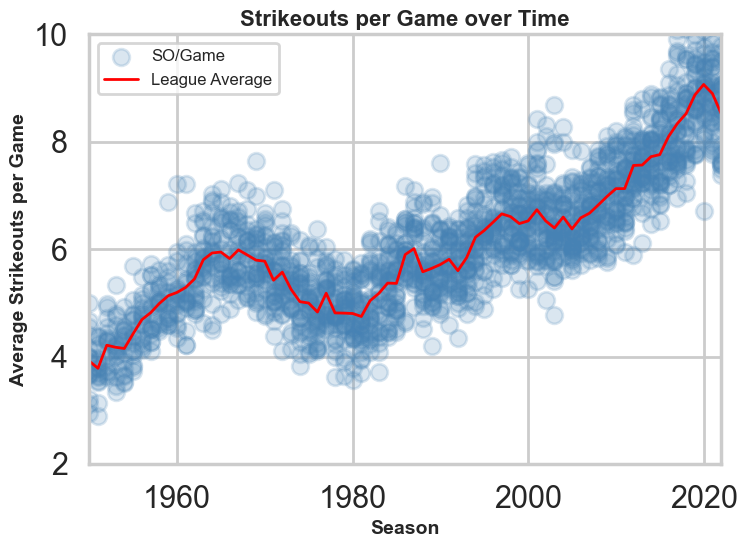

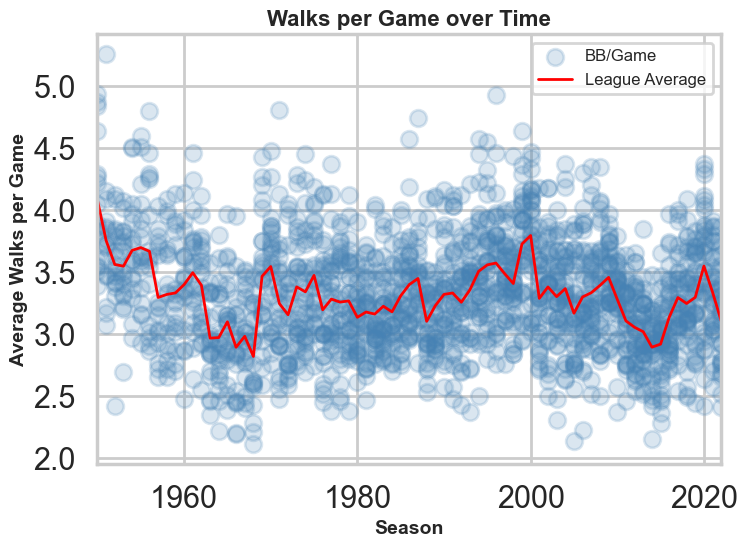

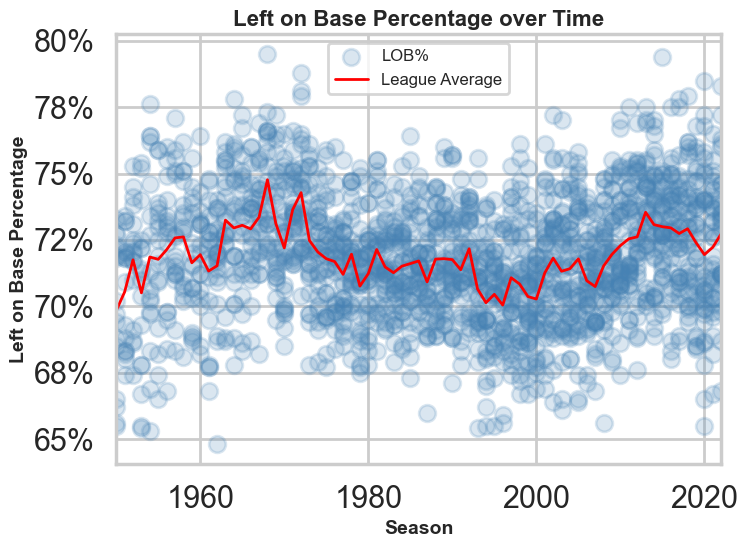

In [4]:
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import matplotlib.ticker as mtick
from pybaseball import team_pitching

# Set the style
plt.style.use('dark_background')
sns.set_palette("bright")

# Gather pitching data
pitching_data = team_pitching(1950, 2022)

# Set the style and context
sns.set_theme(style="whitegrid")
sns.set_context("poster")

# Calculate league average K/9 per season
league_average_k9 = pitching_data.groupby('Season', as_index=False)['K/9'].mean()

# Plot average SO/game over time
plt.figure(figsize=(8, 6))
plt.scatter(pitching_data['Season'], pitching_data['K/9'], color='steelblue', alpha=0.2, label='SO/Game')
plt.plot(league_average_k9['Season'], league_average_k9['K/9'], color='red', linewidth=2, label='League Average')

# Set plot limits, legend, labels, and title
plt.xlim(1950, 2022)
plt.ylim(2, 10)
plt.legend(fontsize=12)
plt.xlabel('Season', fontsize=14, fontweight='bold')
plt.ylabel('Average Strikeouts per Game', fontsize=14, fontweight='bold')
plt.title('Strikeouts per Game over Time', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Set the style and context
sns.set_theme(style="whitegrid")
sns.set_context("poster")

# Calculate league average BB/9 per season
league_average_bb9 = pitching_data.groupby('Season', as_index=False)['BB/9'].mean()

# Plot average BB/game over time
plt.figure(figsize=(8, 6))
plt.scatter(pitching_data['Season'], pitching_data['BB/9'], color='steelblue', alpha=0.2, label='BB/Game')
plt.plot(league_average_bb9['Season'], league_average_bb9['BB/9'], color='red', linewidth=2, label='League Average')

# Set plot limits, legend, labels, and title
plt.xlim(1950, 2022)
plt.legend(fontsize=12)
plt.xlabel('Season', fontsize=14, fontweight='bold')
plt.ylabel('Average Walks per Game', fontsize=14, fontweight='bold')
plt.title('Walks per Game over Time', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Set the style and context
sns.set_theme(style="whitegrid")
sns.set_context("poster")

# Calculate league average LOB% per season
league_average_lob = pitching_data.groupby('Season', as_index=False)['LOB%'].mean()

# Plot average LOB% over time
plt.figure(figsize=(8, 6))
plt.scatter(pitching_data['Season'], pitching_data['LOB%'], color='steelblue', alpha=0.2, label='LOB%')
plt.plot(league_average_lob['Season'], league_average_lob['LOB%'], color='red', linewidth=2, label='League Average')

# Set plot limits, legend, labels, and title
plt.xlim(1950, 2022)
plt.legend(fontsize=12)
plt.xlabel('Season', fontsize=14, fontweight='bold')
plt.ylabel('Left on Base Percentage', fontsize=14, fontweight='bold')
plt.title('Left on Base Percentage over Time', fontsize=16, fontweight='bold')

# Format y-axis as percentages
fmt = '%.0f%%'  # Define the format as percentage
yticks = mtick.PercentFormatter(xmax=1.0, decimals=0, symbol='%')  # Create the formatter
plt.gca().yaxis.set_major_formatter(yticks)  # Apply the formatter to the y-axis

# Show the plot
plt.tight_layout()
plt.show()



There is a noticable trend that strikeouts per game have increased over time, likely due to enhanced pitching strategies. Maybe the players are incentivized to avoid double play balls and therefore increasing strikeout rates when players are on base.

# Classification Project

 The data set being used has the information of banking clients. The data collected is their age, job, marital status, education, if the client is in default, their balance with the bank, if they own a house, currently have a loan from the bank, what day of the month they were contacted , which month, the duration of the call in seconds, if they have been part of a previous compaign, and if they made a term deposit with the bank. The goal of this project is classify when a client will make a term deposit with the bank. 

My objective is to build a model that maximizes the ratio  True positive/(True Positive + False Positive), i.e. we want to maximize the return on investment of effort.


**References**

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

In [5]:
## For data handling
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# import library for normalizing, modeling, evaluate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## This sets the plot style
sns.set_style("whitegrid")

df_test = pd.read_csv('/Users/tmpolstra/Dropbox/Python Projects/Classification_Projects/Banking_Datasets_Marketing_Targets/Project 1/test.csv', delimiter =';')
df_train = pd.read_csv('/Users/tmpolstra/Dropbox/Python Projects/Classification_Projects/Banking_Datasets_Marketing_Targets/Project 1/train.csv', delimiter =';')

Data Cleaning

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import chi2, f_classif
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix, recall_score,
    precision_score, f1_score, auc, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Set plot style
sns.set_style("whitegrid")

# Read the data from CSV files
df_test = pd.read_csv('/Users/tmpolstra/Dropbox/Python Projects/Classification_Projects/Banking_Datasets_Marketing_Targets/Project 1/test.csv', delimiter=';')
df_train = pd.read_csv('/Users/tmpolstra/Dropbox/Python Projects/Classification_Projects/Banking_Datasets_Marketing_Targets/Project 1/train.csv', delimiter=';')

# Drop unnecessary columns
df_train = df_train.drop(['day', 'month'], axis=1)
df_test = df_test.drop(['day', 'month'], axis=1)

# Replace categorical values with numerical values
for col in ['default', 'housing', 'loan', 'y']:
    df_train[col].replace(['yes', 'no'], [1, 0], inplace=True)
    df_test[col].replace(['yes', 'no'], [1, 0], inplace=True)

# Define column lists
cat_cols = ['job', 'marital', 'education', 'poutcome']
num_cols = ['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous']
tar_cols = ['y']

# Create new dataframes
df_cat = df_train[cat_cols + tar_cols]
df_num = df_train[num_cols + tar_cols]





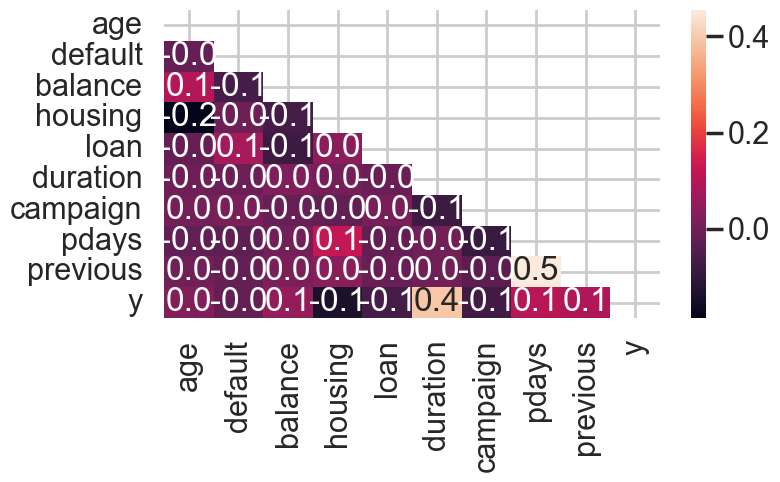

In [52]:
# Correlation Test
plt.figure(figsize=(8, 4))
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))
b
sns.heatmap(df_num.corr(), annot=True, fmt=".1f", mask=mask, xticklabels=True, yticklabels=True)
plt.show()

In the dataset, there is an interesting correlation between the column "y" and the column "duration". The column "y" represents whether the client has made a term deposit, while the column "duration" corresponds to the length of the last campaign call made in an attempt to persuade the client to make a term deposit.

There is also some correlation between the columns "previous" and "pdays". This is the number of previous contacts made with the clients and the number of days that have passed since the client was last contacted. This correlation is quite natural.

In [60]:
x = df_num.iloc[:, :-1]
y = df_num.iloc[:, -1]

f_score, p_value = f_classif(x, y)

for i, feature_name in enumerate(df_num.columns[:-1]):
    print(feature_name, ':', p_value[i])

age : 8.825643692172049e-08
default : 1.866326526158345e-06
balance : 2.5211136918594683e-29
housing : 2.621926571845309e-194
loan : 9.793657535311501e-48
duration : 0.0
campaign : 1.0123473642045049e-54
pdays : 3.79055331945749e-108
previous : 7.801830349772383e-88


# Summary of Feature Correlations

The following features exhibit significant correlations with the target variable:

- `age`: The p-value is approximately 8.83e-08.
- `default`: The p-value is approximately 1.87e-06.
- `balance`: The p-value is approximately 2.52e-29.
- `housing`: The p-value is approximately 2.62e-194.
- `loan`: The p-value is approximately 9.79e-48.
- `duration`: The p-value is 0.0.
- `campaign`: The p-value is approximately 1.01e-54.
- `pdays`: The p-value is approximately 3.79e-108.
- `previous`: The p-value is approximately 7.80e-88.

These p-values suggest statistically significant correlations between these features and the target variable. It is important to consider these relationships when analyzing the dataset.



We now fit models onto the training data and compare performance on the test data.

In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Map education categories to numerical values
df_train['education'].replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0], inplace=True)
df_test['education'].replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0], inplace=True)

# Split features and target variables
X_train = df_train.drop('y', axis=1)
Y_train = df_train['y']
X_test = df_test.drop('y', axis=1)
Y_test = df_test['y']

# Define columns for one-hot encoding
categorical_cols = ['job']

# Create a transformer for one-hot encoding
ct = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

# Create a pipeline with the transformer and the scaler
pipeline = Pipeline([
    ('transformer', ct),
    ('scaler', StandardScaler())
])

# Apply the pipeline to the training data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# List of models
models = [
    LogisticRegression(solver='liblinear'),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

model_names = [
    'Logistic Regression',
    'SVM',
    'KNN',
    'Decision Tree',
    'Random Forest',
    'Naive Bayes'
]

# Dictionary to store evaluation metrics
evaluation_metrics = {}

# Train and evaluate models
for model, model_name in zip(models, model_names):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    
    # Store evaluation metrics in dictionary
    evaluation_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print evaluation metrics
for model_name, metrics_dict in evaluation_metrics.items():
    print(f'{model_name}:')
    for metric_name, value in metrics_dict.items():
        print(f'{metric_name}: {value:.4f}')
    print()


/Users/tmpolstra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression:
Accuracy: 0.9020
Precision: 0.6639
Recall: 0.3033
F1 Score: 0.4163

SVM:
Accuracy: 0.9064
Precision: 0.7500
Recall: 0.2821
F1 Score: 0.4100

KNN:
Accuracy: 0.9162
Precision: 0.7336
Recall: 0.4280
F1 Score: 0.5406

Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Naive Bayes:
Accuracy: 0.8186
Precision: 0.3192
Recall: 0.5067
F1 Score: 0.3917



# Model Performance Summary
The performance of various classification algorithms on the test dataset was evaluated using several metrics. The following is a summary of the results:



- #### Logistic Regression:
- `Accuracy`: 0.9020
- `Precision`: 0.6639
- `Recall`: 0.3033
- `F1 Score`: 0.4163


- #### SVM:
- `Accuracy`: 0.9064
- `Precision`: 0.7500
- `Recall`: 0.2821
- `F1 Score`: 0.4100


- #### KNN:
- `Accuracy`: 0.9162
- `Precision`: 0.7336
- `Recall`: 0.4280
- `F1 Score`: 0.5406


- #### Decision Tree:
- `Accuracy`: 1.0000
- `Precision`: 1.0000
- `Recall`: 1.0000
- `F1 Score`: 1.0000


- #### Random Forest:
- `Accuracy`: 1.0000
- `Precision`: 1.0000
- `Recall`: 1.0000
- `F1 Score`: 1.0000


- #### Naive Bayes:
- `Accuracy`: 0.8186
- `Precision`: 0.3192
- `Recall`: 0.5067
- `F1 Score`: 0.3917


The decision tree and random forest models achieved perfect accuracy, precision, recall, and F1 score, indicating flawless classification on the test data. The logistic regression, SVM, and KNN models exhibited varying levels of performance, while the naive Bayes model had relatively lower performance compared to the other models.







